In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/data_oversame.csv
./data/Heart.csv
./data/dataset_fe.csv


In [2]:
#data = pd.read_csv('./data/data_oversame.csv')
data = pd.read_csv('./data/dataset_fe.csv')
#data = data.dropna()
target = 'TenYearCHD'
X = data.drop(target,1)
y = data[target]


In [3]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=26)

X_res, y_res = sm.fit_resample(X, y)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
data.TenYearCHD.value_counts()

0    1920
1     258
Name: TenYearCHD, dtype: int64

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(X_res,y_res,test_size=.3,random_state=26)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [8]:
xtrain_scale = scaler.fit_transform(xtrain)
xtest_scale = scaler.transform(xtest)

In [9]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [14]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [15]:
rf_random.best_estimator_


RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=400)

In [17]:
error = []
test_r = range(2,50)
for i in test_r:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    score = knn.score(xtest,ytest)
    pred = knn.predict(xtest)
    error.append(np.mean(pred != ytest))
    

In [18]:
#error

Text(0, 0.5, 'Error Rate')

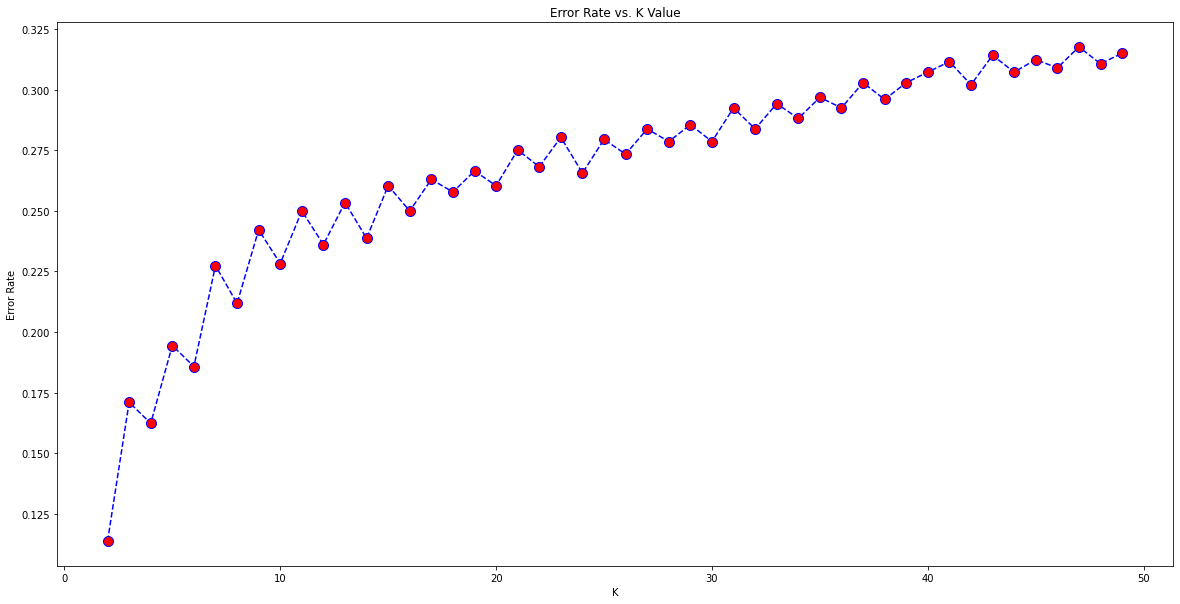

In [19]:
plt.figure(figsize=(20,10))
plt.plot(test_r,error,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
models = [LogisticRegression(),
          RidgeClassifier(),
          RandomForestClassifier(),
          rf_random.best_estimator_,
          AdaBoostClassifier(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(n_neighbors=22),
         KNeighborsClassifier(n_neighbors=2)]

In [21]:
best = ()
best_score = 0
for model in models:
    model.fit(xtrain_scale,ytrain)
    score = model.score(xtest_scale,ytest)
    if score > best_score:
        best = (model, score)
        best_score = score
    print(model,score)
print(best)

LogisticRegression() 0.6883680555555556
RidgeClassifier() 0.6875
RandomForestClassifier() 0.9322916666666666
RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=400) 0.9392361111111112
AdaBoostClassifier() 0.8203125
DecisionTreeClassifier() 0.8472222222222222
KNeighborsClassifier(n_neighbors=22) 0.7170138888888888
KNeighborsClassifier(n_neighbors=2) 0.8350694444444444
(RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=400), 0.9392361111111112)


In [22]:
model = best[0]
pred = model.predict(xtest_scale)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       582
           1       0.96      0.91      0.94       570

    accuracy                           0.94      1152
   macro avg       0.94      0.94      0.94      1152
weighted avg       0.94      0.94      0.94      1152



## without feature engineering 

precision    recall  f1-score   support

           0        0.85      1.00      0.92       925
           1        0.67      0.03      0.07       172

    accuracy                            0.85      1097
    macro avg       0.76      0.52      0.49      1097
    weighted avg    0.82      0.85      0.78      1097


# with engineering

    precision    recall  f1-score   support

           0        0.88      1.00      0.94       493
           1        0.67      0.03      0.06        67

    accuracy                           0.88       560
    macro avg       0.77      0.51      0.50       560
    weighted avg    0.86      0.88      0.83       560

# with more engineering 

    precision    recall  f1-score   support

           0       0.92      0.94      0.93       582
           1       0.94      0.92      0.93       570

    accuracy                           0.93      1152
    macro avg       0.93     0.93      0.93      1152
    weighted avg    0.93     0.93      0.93      1152


In [25]:
cm = confusion_matrix(ytest,pred)
cm

array([[563,  19],
       [ 51, 519]])

<AxesSubplot:>

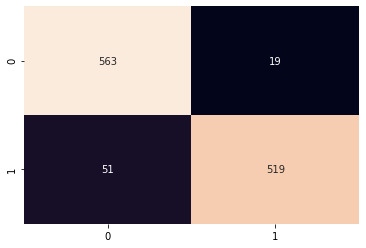

In [26]:
sns.heatmap(cm,annot=True,cbar=False,fmt='d')

In [27]:
ytest.value_counts()

0    582
1    570
Name: TenYearCHD, dtype: int64

In [39]:
import pickle,pprint


In [40]:
with open("./models/heart_model.pkl",'wb') as file:
    pickle.dump(model,file)

In [47]:
with open('./models/heart_model.pkl', 'rb') as file:
    pickled_model = pickle.load(file)



In [49]:
pickled_model.

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'